In [2]:
from simple_multi_unet_model import multi_unet_model
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
SIZE_X = 128 
SIZE_Y = 128
n_classes=4

In [4]:
train_images = []

In [5]:
for directory_path in glob.glob("128_patches/images/"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
        img = cv2.imread(img_path, 0)       
        train_images.append(img)


In [6]:
train_images = np.array(train_images)

In [7]:
train_images

array([[[117, 124, 127, ..., 116, 138, 140],
        [122, 123, 123, ..., 114, 125, 128],
        [124, 124, 122, ..., 125, 121, 111],
        ...,
        [ 92,  71,  55, ..., 157, 135, 121],
        [131, 115,  91, ..., 144, 127, 116],
        [135, 140, 138, ..., 135, 124, 120]],

       [[ 27,  30,  44, ...,  56,  59,  78],
        [ 31,  35,  48, ...,  44,  48,  62],
        [ 38,  37,  55, ...,  28,  37,  49],
        ...,
        [127, 123, 118, ..., 132, 131, 122],
        [124, 122, 116, ..., 133, 128, 128],
        [114, 113, 117, ..., 117, 115, 122]],

       [[143, 132, 126, ..., 113, 105,  94],
        [139, 129, 121, ...,  99,  99, 100],
        [126, 123, 114, ...,  91,  98, 101],
        ...,
        [125, 132, 131, ..., 127, 144, 144],
        [125, 127, 131, ..., 151, 141, 136],
        [120, 124, 124, ..., 160, 143, 136]],

       ...,

       [[ 96, 102, 110, ..., 149, 150, 151],
        [105, 106, 110, ..., 146, 143, 148],
        [114, 110, 107, ..., 149, 144, 149

In [8]:
train_masks = [] 
for directory_path in glob.glob("128_patches/masks/"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.tif")):
        mask = cv2.imread(mask_path, 0)       
        train_masks.append(mask)


In [9]:
train_masks = np.array(train_masks)

In [10]:
train_masks

array([[[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[1, 1, 1, ..., 1, 1, 2],
        [1, 1, 1, ..., 1, 1, 2],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        [3, 3, 3, ..., 2, 2, 2],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       ...,

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]],

       [[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)
np.unique(train_masks_encoded_original_shape)


c:\Users\ashmi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 2, 3], dtype=int64)

In [12]:
train_images = np.expand_dims(train_images, axis=3)
train_images = normalize(train_images, axis=1)

train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)


In [13]:
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.10, random_state = 0)


In [14]:

X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

print("Class values in the dataset are ... ", np.unique(y_train))

Class values in the dataset are ...  [0 1 2 3]


In [15]:
from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))

In [16]:
test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [19]:

IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [20]:
def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 128, 128, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 16)         2320      ['dropout[0][0]']             
                                                                                            

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
call = keras.callbacks.EarlyStopping(monitor='val_loss',
                                              patience=3)

In [43]:
history = model.fit(X_train, y_train_cat, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test_cat), 
                    callbacks=[call],
                    shuffle=False)


Epoch 1/50


72/72 [==============================] - 43s 552ms/step - loss: 0.7763 - accuracy: 0.7138 - val_loss: 0.4872 - val_accuracy: 0.8766
Epoch 2/50
72/72 [==============================] - 50s 699ms/step - loss: 0.4339 - accuracy: 0.8720 - val_loss: 0.3522 - val_accuracy: 0.8868
Epoch 3/50
72/72 [==============================] - 53s 743ms/step - loss: 0.3867 - accuracy: 0.8740 - val_loss: 0.3094 - val_accuracy: 0.8886
Epoch 4/50
72/72 [==============================] - 47s 648ms/step - loss: 0.3399 - accuracy: 0.8794 - val_loss: 0.2729 - val_accuracy: 0.8925
Epoch 5/50
72/72 [==============================] - 45s 632ms/step - loss: 0.3018 - accuracy: 0.8890 - val_loss: 0.2459 - val_accuracy: 0.9100
Epoch 6/50
72/72 [==============================] - 46s 635ms/step - loss: 0.2761 - accuracy: 0.9018 - val_loss: 0.2263 - val_accuracy: 0.9181
Epoch 7/50
72/72 [==============================] - 46s 639ms/step - loss: 0.2484 - accuracy: 0.9126 - val_loss: 0.2066 - val_accuracy: 0.92

In [44]:
model.save('test.hdf5')


c:\Users\ashmi\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
_, acc = model.evaluate(X_test, y_test_cat)
print("Accuracy is = ", (acc * 100.0), "%")


5/5 [==============================] - 2s 366ms/step - loss: 0.1327 - accuracy: 0.9530
Accuracy is =  95.29830813407898 %


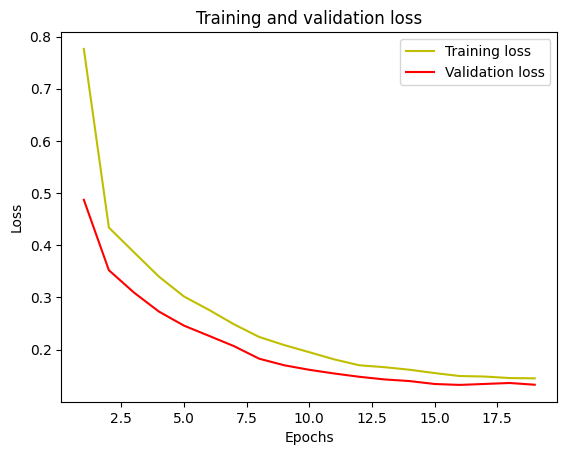

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [48]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


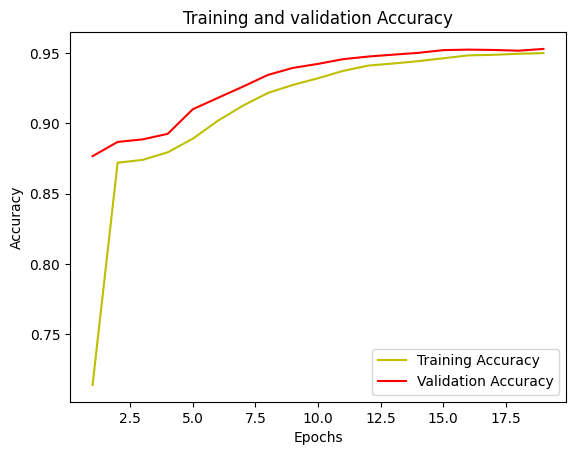

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:
model.load_weights('test.hdf5')  

In [52]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

5/5 [==============================] - 2s 308ms/step


In [53]:
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


Mean IoU = 0.8257163


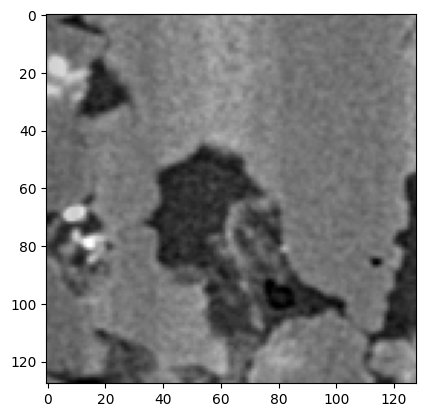

In [61]:
plt.imshow(train_images[0, :,:,0],cmap= 'grey')

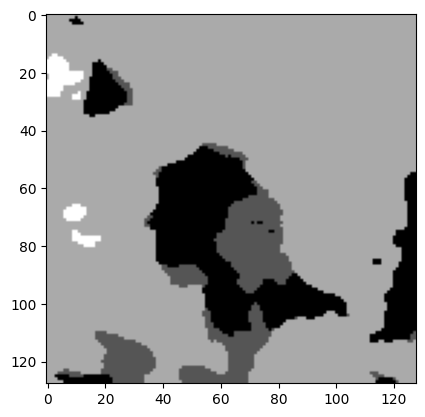

In [62]:
plt.imshow(train_masks[0],cmap='grey')

1/1 [==============================] - 0s 94ms/step


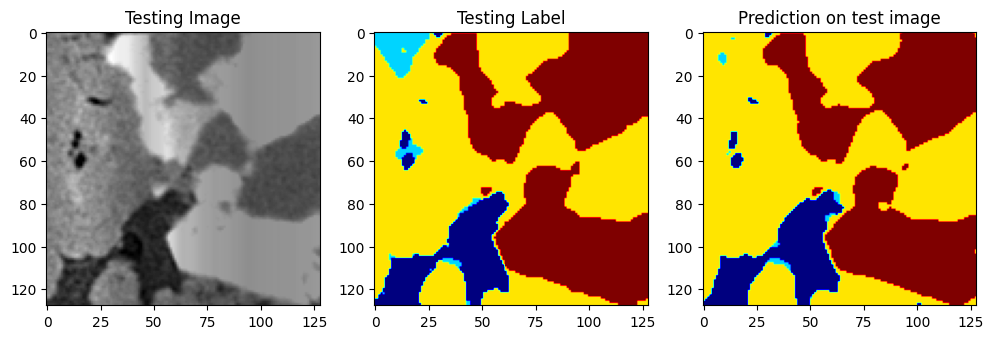

In [63]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='jet')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='jet')
plt.show()